In [9]:
### import
import torch

import pickle
import matplotlib.pyplot as plt
import io

In [30]:
### Graph extract
class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else: 
            return super().find_class(module, name)

def show_result():
    # file open
    with open('./results/psnr_list_915.pickle', 'rb') as f:
        psnr_epoch_915 = CPU_Unpickler(f).load()
    with open('./results/psnr_list_935.pickle', 'rb') as f:
        psnr_epoch_935 = CPU_Unpickler(f).load()
    with open('./results/psnr_list_955.pickle', 'rb') as f:
        psnr_epoch_955 = CPU_Unpickler(f).load()

    # max PSNR
    print('psnr max', float(max(psnr_epoch_915)), float(max(psnr_epoch_935)), float(max(psnr_epoch_955)))

    # graph plot
    plt.plot(list(range(1, len(psnr_epoch_915)+1)), [psnr.cpu() for psnr in psnr_epoch_915], label='9-1-5')
    plt.plot(list(range(1, len(psnr_epoch_935)+1)), [psnr.cpu() for psnr in psnr_epoch_935], label='9-3-5')
    plt.plot(list(range(1, len(psnr_epoch_955)+1)), [psnr.cpu() for psnr in psnr_epoch_955], label='9-5-5')

    plt.xlabel('Epochs')
    plt.ylabel('Average test PSNR (dB)')
    plt.legend()
    plt.savefig('./results/PSNR_Graph.png')
    plt.show()

psnr max 31.672964096069336 31.918441772460938 32.062984466552734


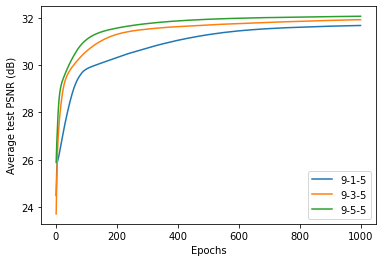

In [31]:
show_result()